In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Test inference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/f.png' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 138MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/f.png: 640x320 1 person, 40.8ms
Speed: 8.8ms preprocess, 40.8ms inference, 301.1ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


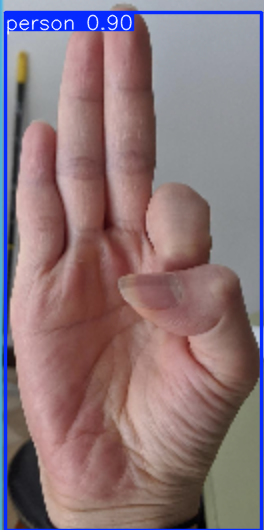

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/f.png', height=600)

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow(api_key="")
project = rf.workspace("workspace-ltakl").project("asl-drwtg-gbmb2")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ASL-1 in yolov8:: 100%|██████████| 1740/1740 [00:00<00:00, 10518.72it/s]


# Custom training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model={HOME}/runs/detect/train/weights/last.pt data={dataset.location}/data.yaml epochs=75 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/last.pt, data=/content/datasets/ASL-1/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

/content


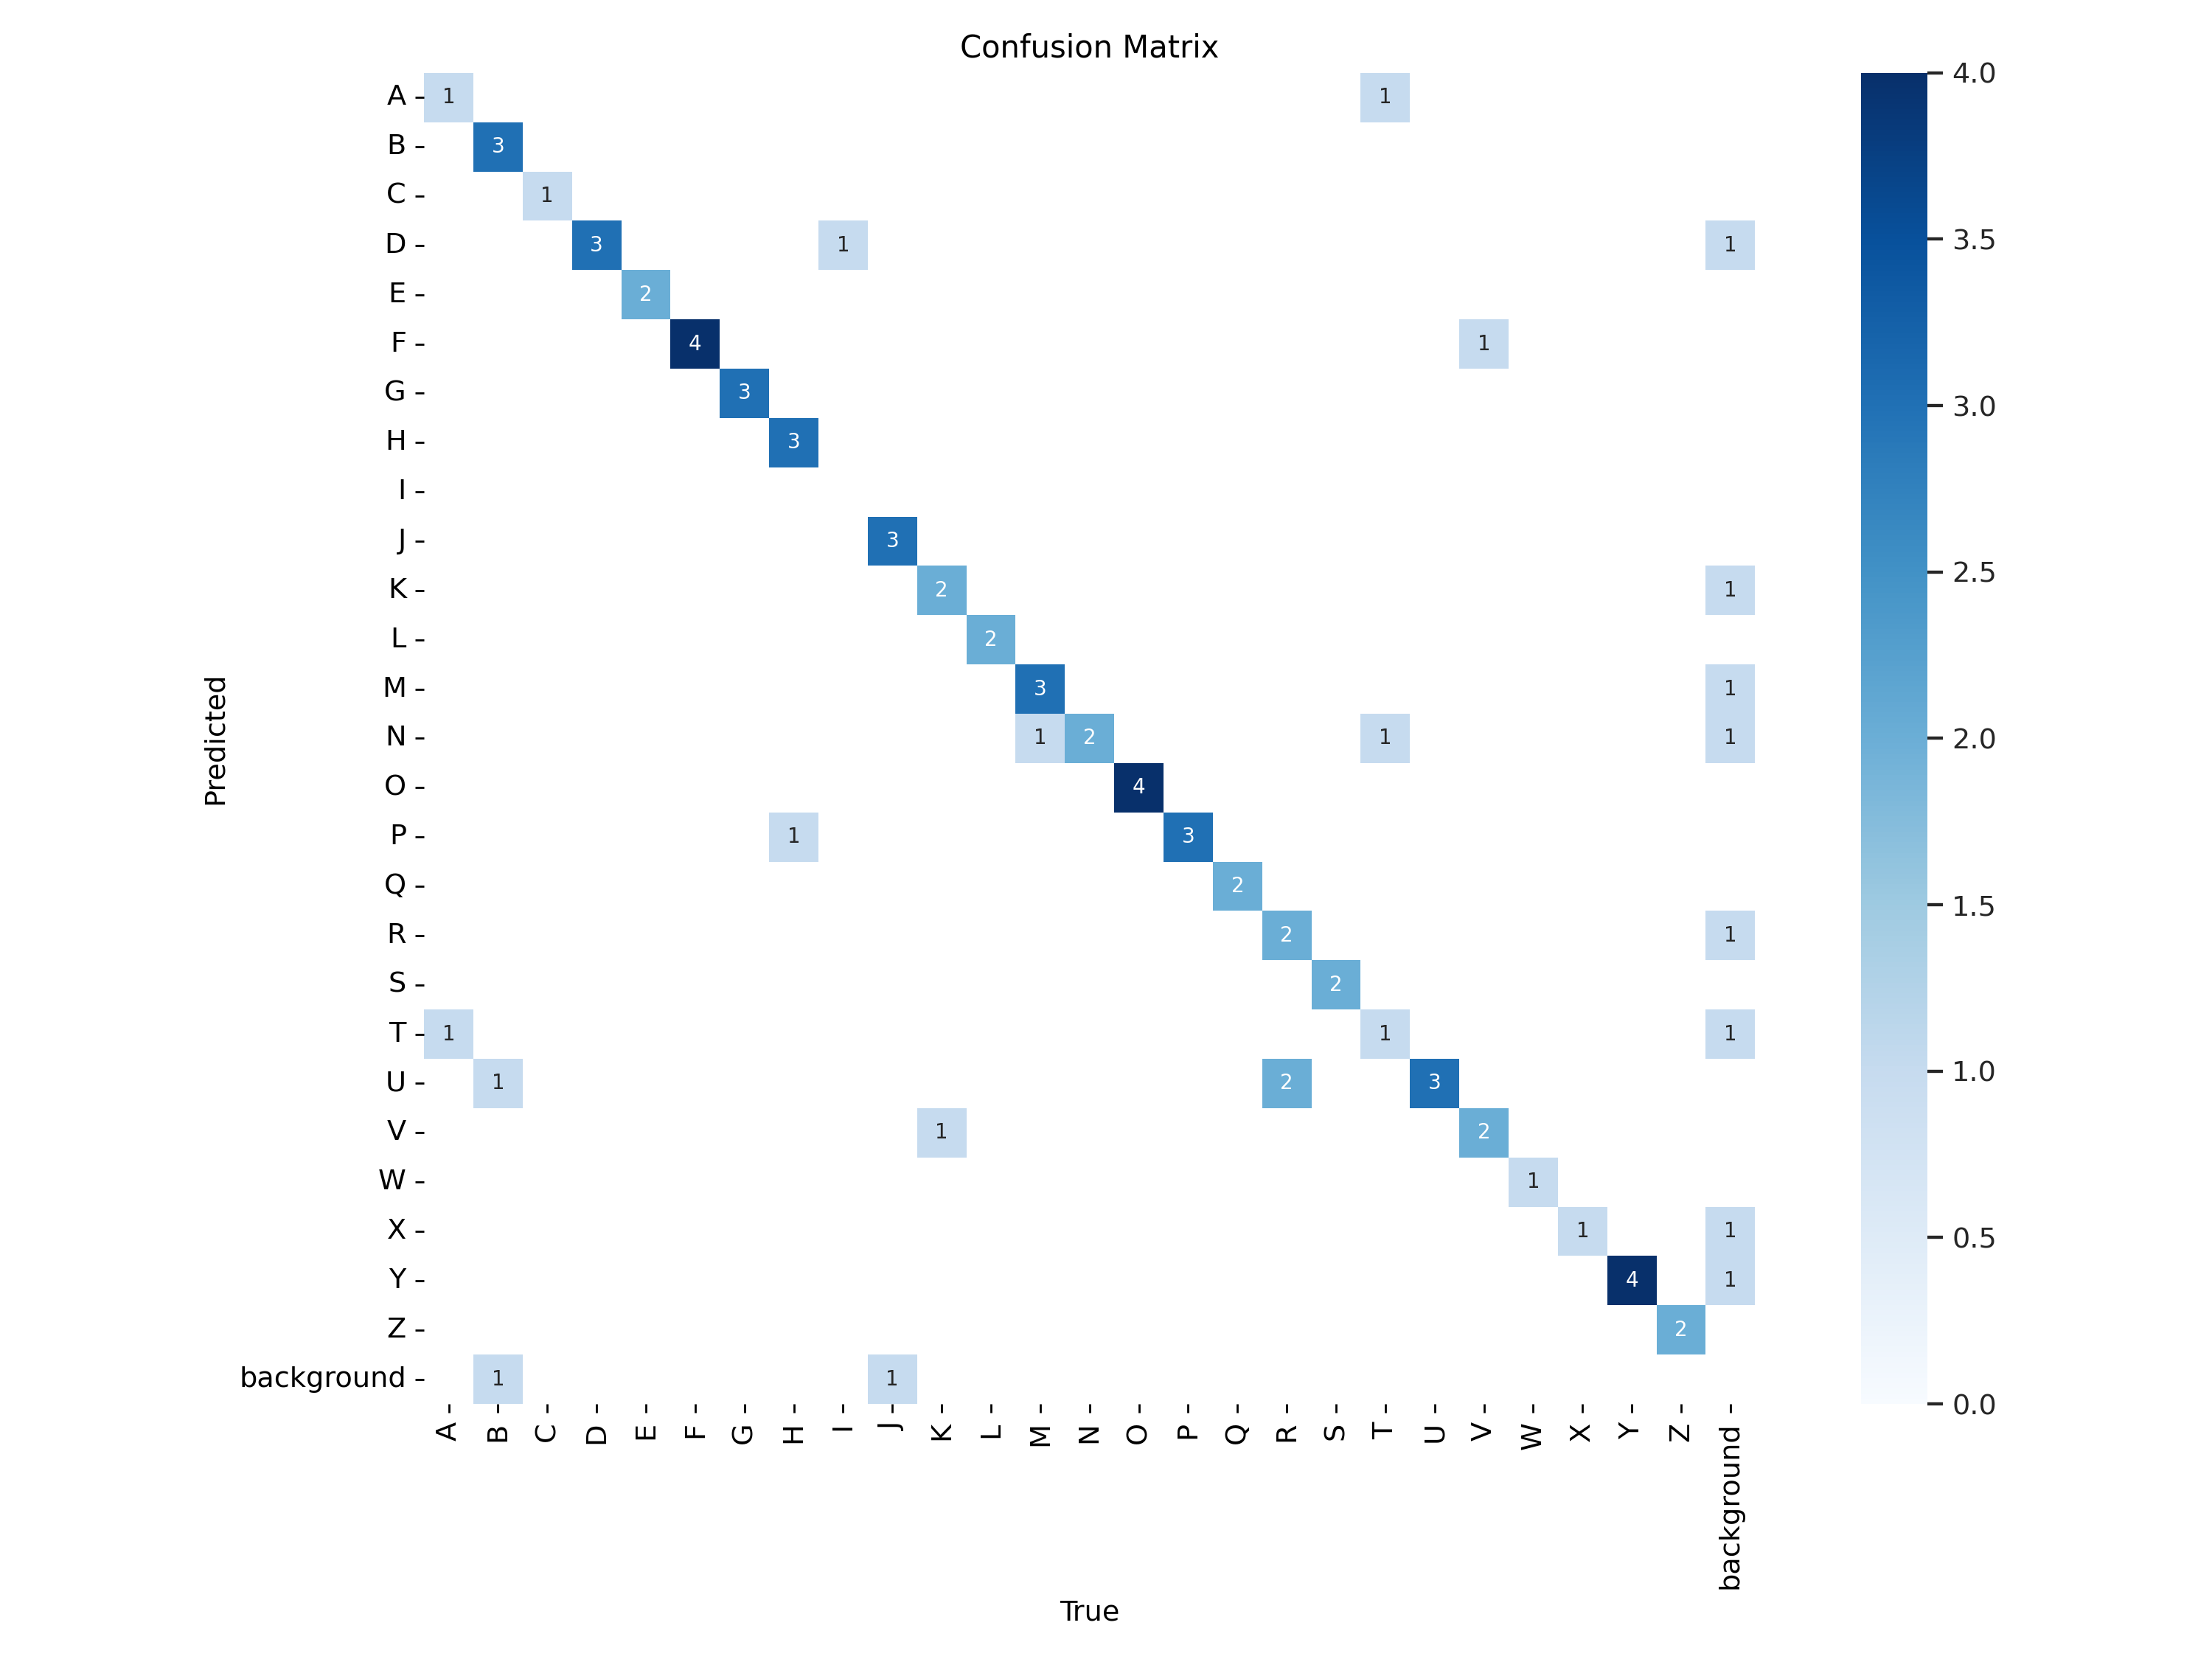

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


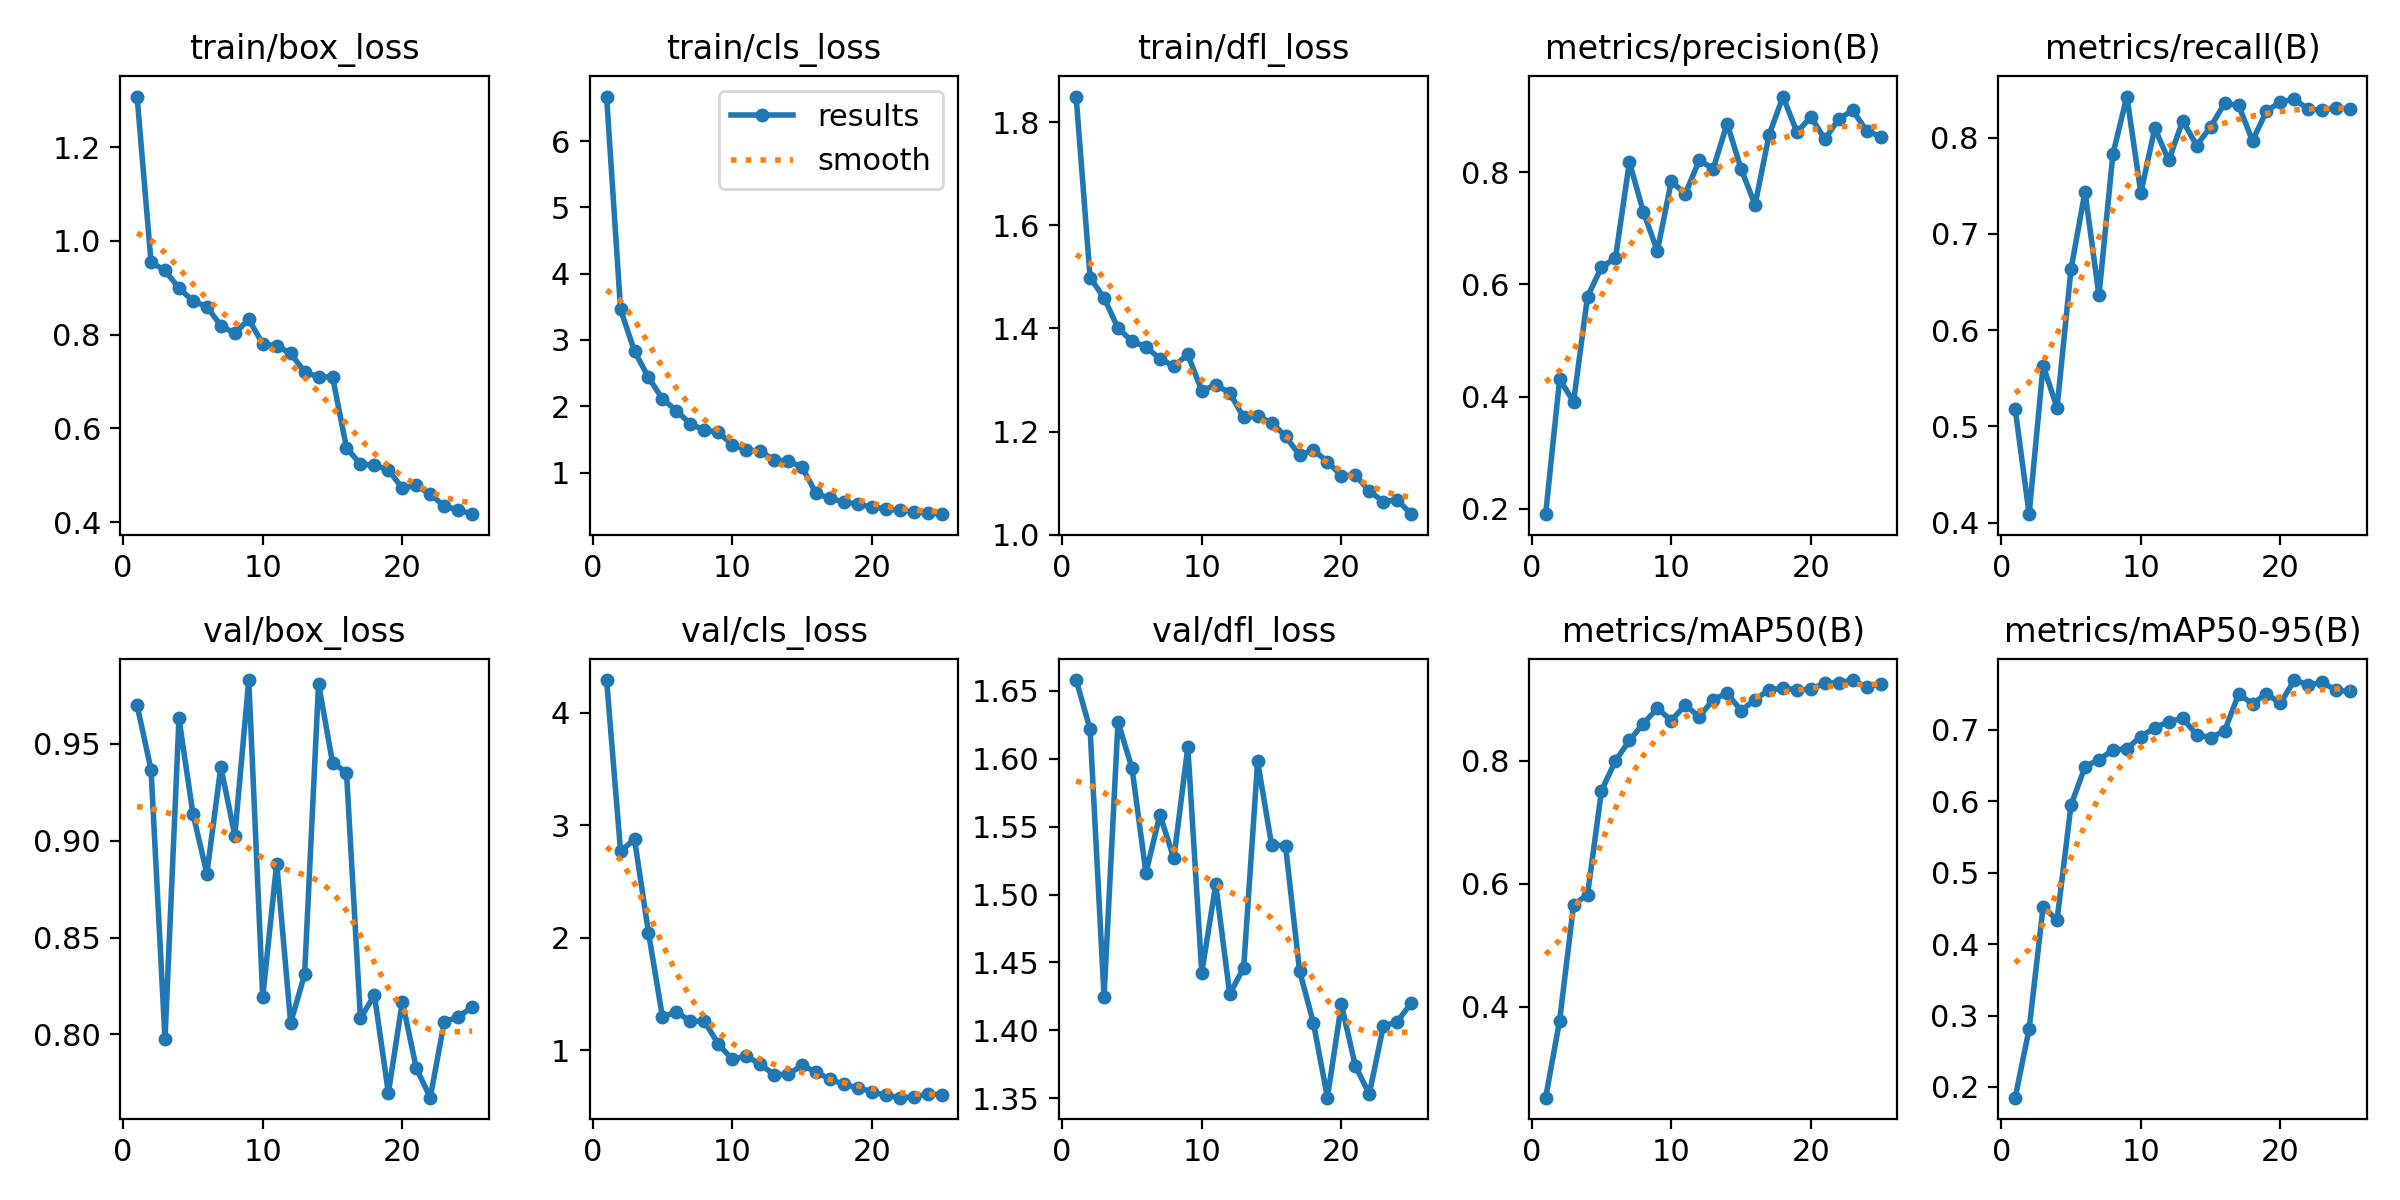

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


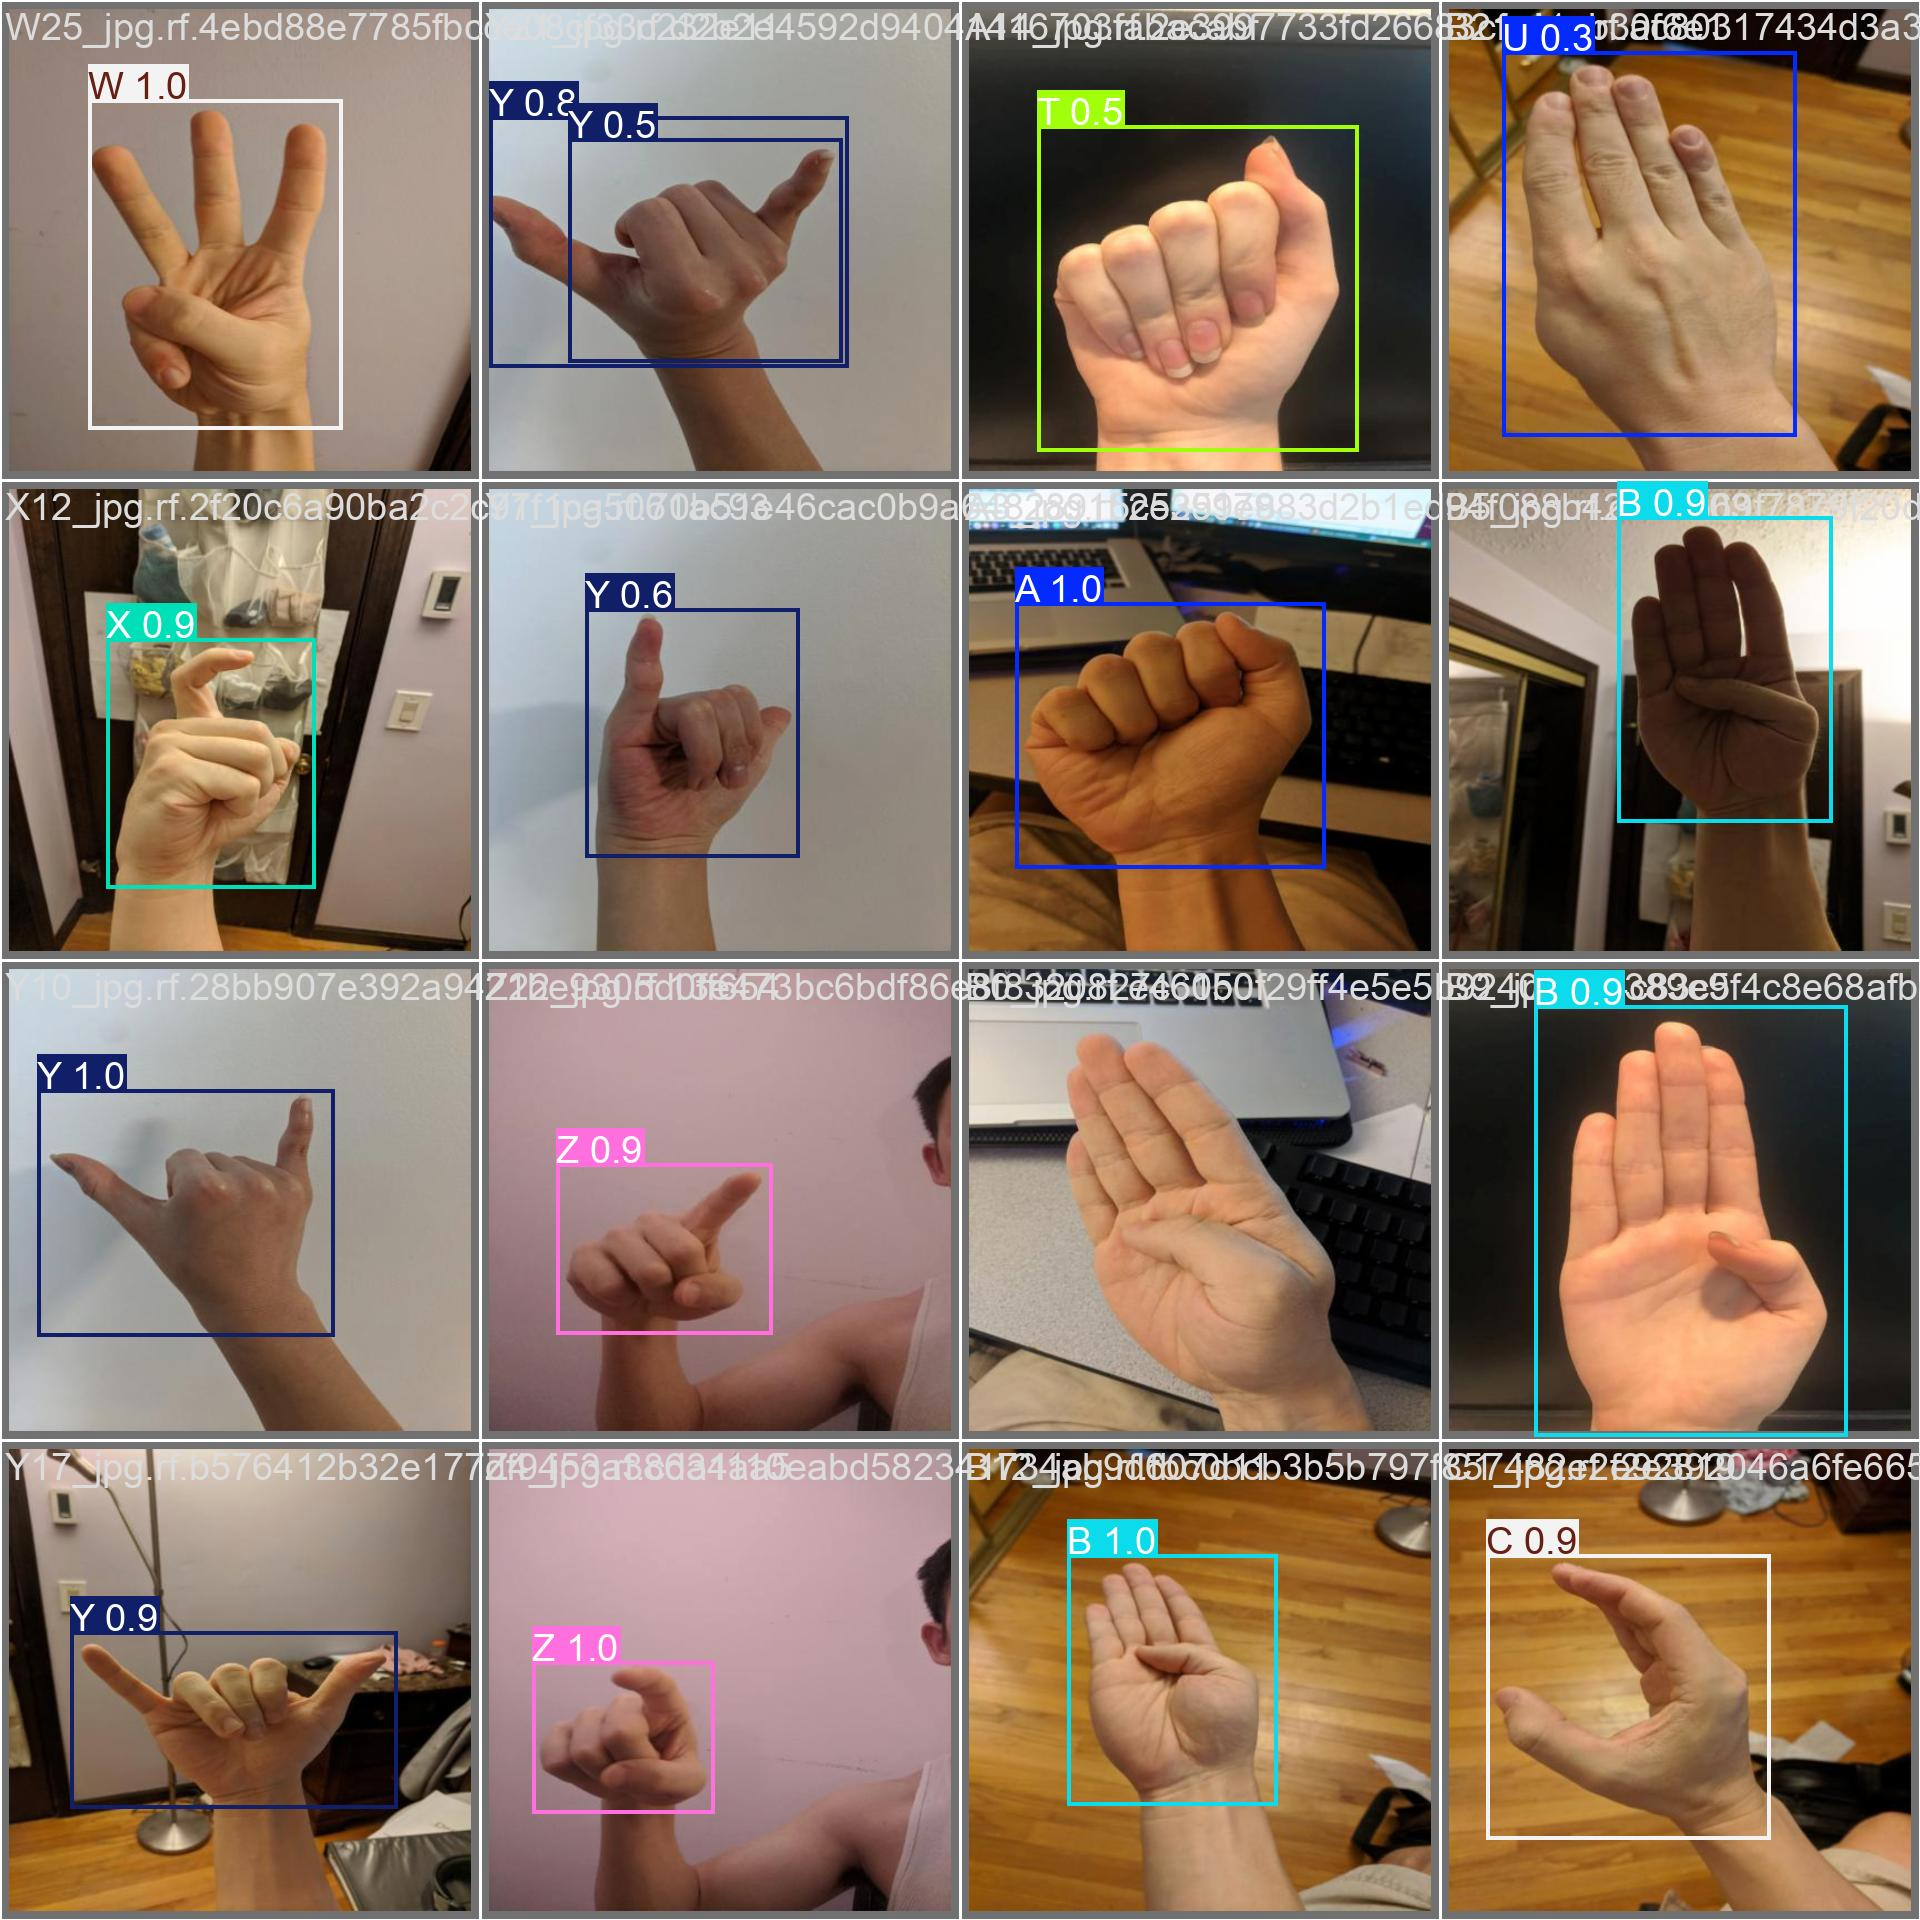

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validate

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,135,646 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/ASL-1/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100% 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:02<00:00,  1.78it/s]
                   all         72         72      0.859       0.84      0.929      0.769
                     A          2          2      0.663        0.5      0.695      0.625
                     B          5          5          1      0.668      0.995      0.805
                     C          1          1      0.761          1      0.995      0.796
                     D          3          3      0.813          1      0.995      0.864
                     E          2          2      0.872          1      0.995      0.796
                     F          4    

# Inference with trained model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,135,646 parameters, 0 gradients, 28.5 GFLOPs

image 1/36 /content/datasets/ASL-1/test/images/B14_jpg.rf.5aa8bd8d91cbce63cc43cd05467c55a8.jpg: 800x800 1 B, 22.9ms
image 2/36 /content/datasets/ASL-1/test/images/B19_jpg.rf.f20a6c7a1a9674301e211f9cde03c08b.jpg: 800x800 1 B, 23.0ms
image 3/36 /content/datasets/ASL-1/test/images/C19_jpg.rf.fe69ac7d62ae4dba2b7cc34523da4310.jpg: 800x800 1 C, 1 F, 22.9ms
image 4/36 /content/datasets/ASL-1/test/images/C23_jpg.rf.492312633c20098aa1b8209be2c4b070.jpg: 800x800 1 C, 22.9ms
image 5/36 /content/datasets/ASL-1/test/images/F17_jpg.rf.0a3af73cb498075a0563a186f3b0c0f4.jpg: 800x800 1 F, 22.9ms
image 6/36 /content/datasets/ASL-1/test/images/G11_jpg.rf.e7581c5f67d4b42c87884ac8788f9981.jpg: 800x800 1 G, 22.9ms
image 7/36 /content/datasets/ASL-1/test/images/G3_jpg.rf.c2d503a8c967455130a96650deecad6c.jpg: 800x800 1 G, 22.9ms
ima

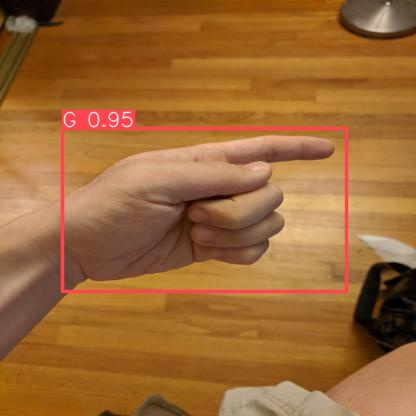

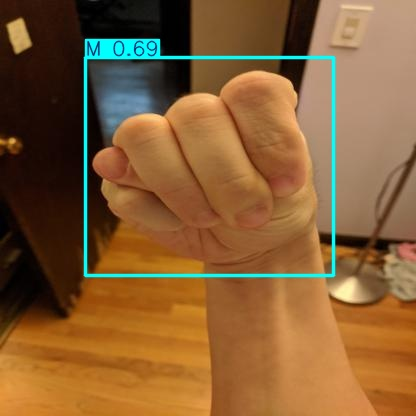

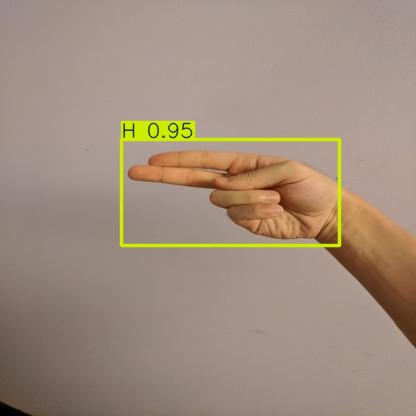

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# Export to tf.js

In [ ]:
!yolo export model="/content/runs/detect/train2/weights/best.pt" format=tfjs

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,135,646 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 30, 13125) (21.5 MB)
E0000 00:00:1753108905.132701   23614 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753108905.138300   23614 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

In [ ]:
!zip -r /content/best_web_model.zip /content/runs/detect/train2/weights/best_web_model

  adding: content/runs/detect/train2/weights/best_web_model/ (stored 0%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard4of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard8of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard9of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/model.json (deflated 95%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard10of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard7of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard11of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/metadata.yaml (deflated 38%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard5of11.bin (deflated 7%)
  adding: content/runs/detect/train2/weights/best_web_model/group1-shard3of11.

In [ ]:
from google.colab import files
files.download('/content/best_web_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>